In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown

# Introdução ao Método da Bissecção

# Método da Bissecção

O **método da bissecção** é um método numérico para encontrar raízes de funções contínuas.
Ele é baseado no **Teorema do Valor Intermediário**, que afirma que se uma função contínua $ f(x) $
assume valores de sinais opostos em dois pontos $ a $ e $ b $, então existe pelo menos uma raiz $r $ dentro desse intervalo.

Matematicamente, se:

$f(a) \cdot f(b) < 0$

então existe um valor $ r $ em  $(a, b)$  tal que $f(r) = 0$.

## Como funciona o Método?
1. Definimos um intervalo inicial \([a, b]\) tal que $ f(a) \cdot f(b) < 0 $.
2. Calculamos o **ponto médio**:
   $$
   m = \frac{a + b}{2}
   $$
3. Avaliamos $ f(m) $:
   - Se $ f(m) \approx 0 $, encontramos a raiz.
   - Se $ f(a) \cdot f(m) < 0 $, então a raiz está em $[a, m]$, redefinimos $b = m $.
   - Caso contrário, a raiz está em $[m, b]$, redefinimos $ a = m $.
4. Repetimos esse processo até que o tamanho do intervalo seja menor que uma **tolerância** predefinida.

## Número de Iterações
O número máximo de iterações $ n $ necessárias para garantir a precisão desejada é dado por:

$$
n = \log_2 \left(\frac{|b - a|}{\text{tolerância}}\right)
$$


In [38]:
# Definição da função
def f(x):
    return x * np.log(x) - 3

# Método da Bissecção
def bisect(function: f, a:float, b:float, tolerancia: float = 1e-12):
    """
    Método da Bissecção para encontrar uma raiz de f(x) no intervalo [a, b].

    Parâmetros:
    a (float): Limite inferior do intervalo.
    b (float): Limite superior do intervalo.
    tolerancia (float, opcional): Critério de parada. O padrão é 1e-12.

    Retorna:
    DataFrame com os valores intermediários das iterações e o valor aproximado da raiz.
    """

    if f(a) * f(b) > 0:
        raise ValueError("Não há garantia de raiz nesse intervalo.")

    iteracoes = []
    valores_a = []
    valores_b = []
    valores_m = []
    valores_fm = []

    while abs(b - a) > tolerancia:
        m = (a + b) / 2
        fm = f(m)

        iteracoes.append(len(iteracoes) + 1)
        valores_a.append(a)
        valores_b.append(b)
        valores_m.append(m)
        valores_fm.append(fm)

        if abs(fm) < tolerancia:
            break

        if f(a) * fm < 0:
            b = m
        else:
            a = m

    df_iteracoes = pd.DataFrame({
        "Iteração": iteracoes,
        "a": valores_a,
        "b": valores_b,
        "m (Ponto Médio)": valores_m,
        "f(m)": valores_fm
    })

    return df_iteracoes, m

# Definição do intervalo
a, b = 2, 3

df_resultados, raiz_aproximada = bisect(f, a, b)


# Exibir os Resultados

In [39]:

display(Markdown("### Tabela de Iterações"))
display(df_resultados)

### Tabela de Iterações

,Iteração,a,b,m (Ponto Médio),f(m)
0,1,2.000000,3.000000,2.500000,-7.092732e-01
1,2,2.500000,3.000000,2.750000,-2.180975e-01
2,3,2.750000,3.000000,2.875000,3.615144e-02
3,4,2.750000,2.875000,2.812500,-9.166753e-02
4,5,2.812500,2.875000,2.843750,-2.792975e-02
5,6,2.843750,2.875000,2.859375,4.068152e-03
6,7,2.843750,2.859375,2.851562,-1.194150e-02
7,8,2.851562,2.859375,2.855469,-3.939347e-03
8,9,2.855469,2.859375,2.857422,6.373488e-05
9,10,2.855469,2.857422,2.856445,-1.937973e-03


Raiz aproximada: 2.8573907835143473


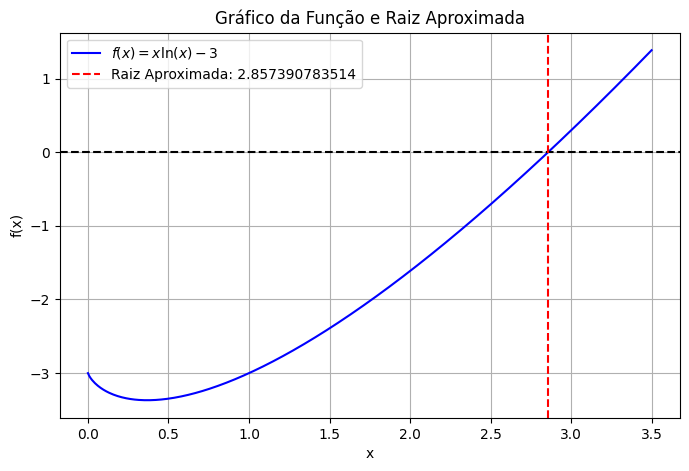

In [45]:
print(f"Raiz aproximada: {raiz_aproximada}")

# Gráfico da Função
x_vals = np.linspace(0.000001, 3.5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = x \ln(x) - 3$', color='b')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(raiz_aproximada, color='r', linestyle='--', label=f'Raiz Aproximada: {raiz_aproximada:.12f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da Função e Raiz Aproximada')
plt.legend()
plt.grid()
plt.show()


In [48]:
def f(x):
  return x**2 -7

a, b = 2, 3

df_resultados2, raiz_aproximada = bisect(f, a, b)
display(df_resultados2)


,Iteração,a,b,m (Ponto Médio),f(m)
0,1,2.000000,3.000000,2.500000,-7.500000e-01
1,2,2.500000,3.000000,2.750000,5.625000e-01
2,3,2.500000,2.750000,2.625000,-1.093750e-01
3,4,2.625000,2.750000,2.687500,2.226562e-01
4,5,2.625000,2.687500,2.656250,5.566406e-02
5,6,2.625000,2.656250,2.640625,-2.709961e-02
6,7,2.640625,2.656250,2.648438,1.422119e-02
7,8,2.640625,2.648438,2.644531,-6.454468e-03
8,9,2.644531,2.648438,2.646484,3.879547e-03
9,10,2.644531,2.646484,2.645508,-1.288414e-03


Raiz aproximada: 2.645751311064487


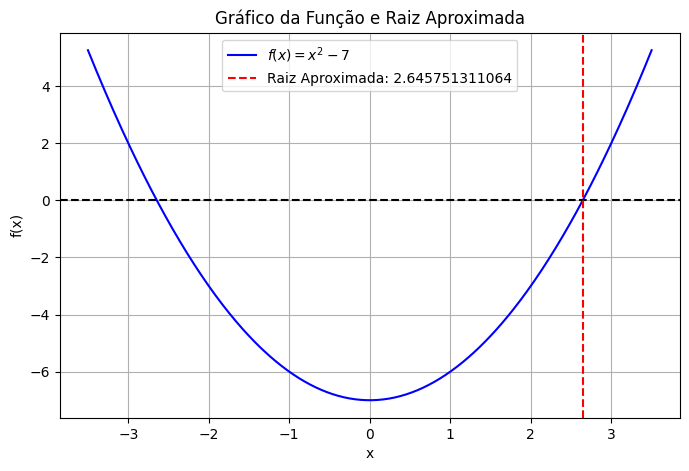

In [47]:
print(f"Raiz aproximada: {raiz_aproximada}")

# Gráfico da Função
x_vals = np.linspace(-3.5, 3.5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 7$', color='b')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(raiz_aproximada, color='r', linestyle='--', label=f'Raiz Aproximada: {raiz_aproximada:.12f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da Função e Raiz Aproximada')
plt.legend()
plt.grid()
plt.show()

# Conclusão

## Conclusão
O **método da bissecção** é uma forma confiável de encontrar raízes de funções contínuas. Ele é especialmente útil quando temos um intervalo conhecido onde a função muda de sinal. A precisão final depende da tolerância escolhida e do número de iterações, conforme mostrado na equação:

$$
n = \log_2 \left(\frac{|b - a|}{\text{tolerância}}\right)
$$

No caso deste exemplo, encontramos que a raiz aproximada da equação $ x \ln x - 3 = 0 $ é **{raiz_aproximada:.12f}**.
